# Data Exploration for ML Use Case 3

In this notebook, we're delving into snow covered road dataset. Our goal is to perform exploratory data analysis (EDA). Specifically, we will set up the data paths appropriately, load the dataset and explore the dataset for preprocessing with diverse visualization techniques.

In [8]:
# import necessary libraries
import numpy as np
import os
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

### 1. Set Up Data Paths and Load the data

In [2]:
train_dir = '../Snow-Covered-Roads-Dataset-main/Snow-Covered-Roads-Dataset-main/dataset/train'
test_dir = '../Snow-Covered-Roads-Dataset-main/Snow-Covered-Roads-Dataset-main/dataset/test'

- with normalization

In [3]:
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)

### 2. Explore the Data

#### Class distribution

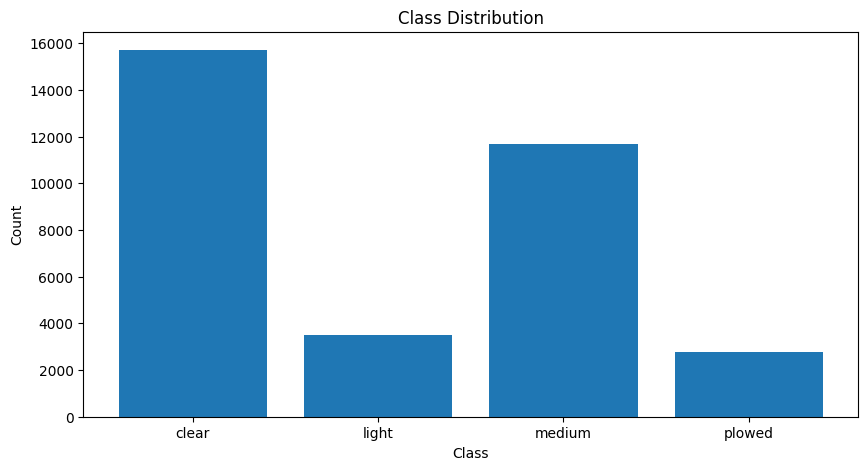

In [5]:
def plot_class_distribution(dataset):
    class_counts = torch.zeros(len(dataset.classes))
    for _, labels in dataset:
        class_counts[labels] += 1

    plt.figure(figsize=(10, 5))
    plt.bar(dataset.classes, class_counts.numpy())
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

plot_class_distribution(train_dataset)

The dataset is highly imbalanced. This class imbalance can lead to biased model training. We need to use oversampling, class weighting, or data augmentation to address this problem.

#### Sample images

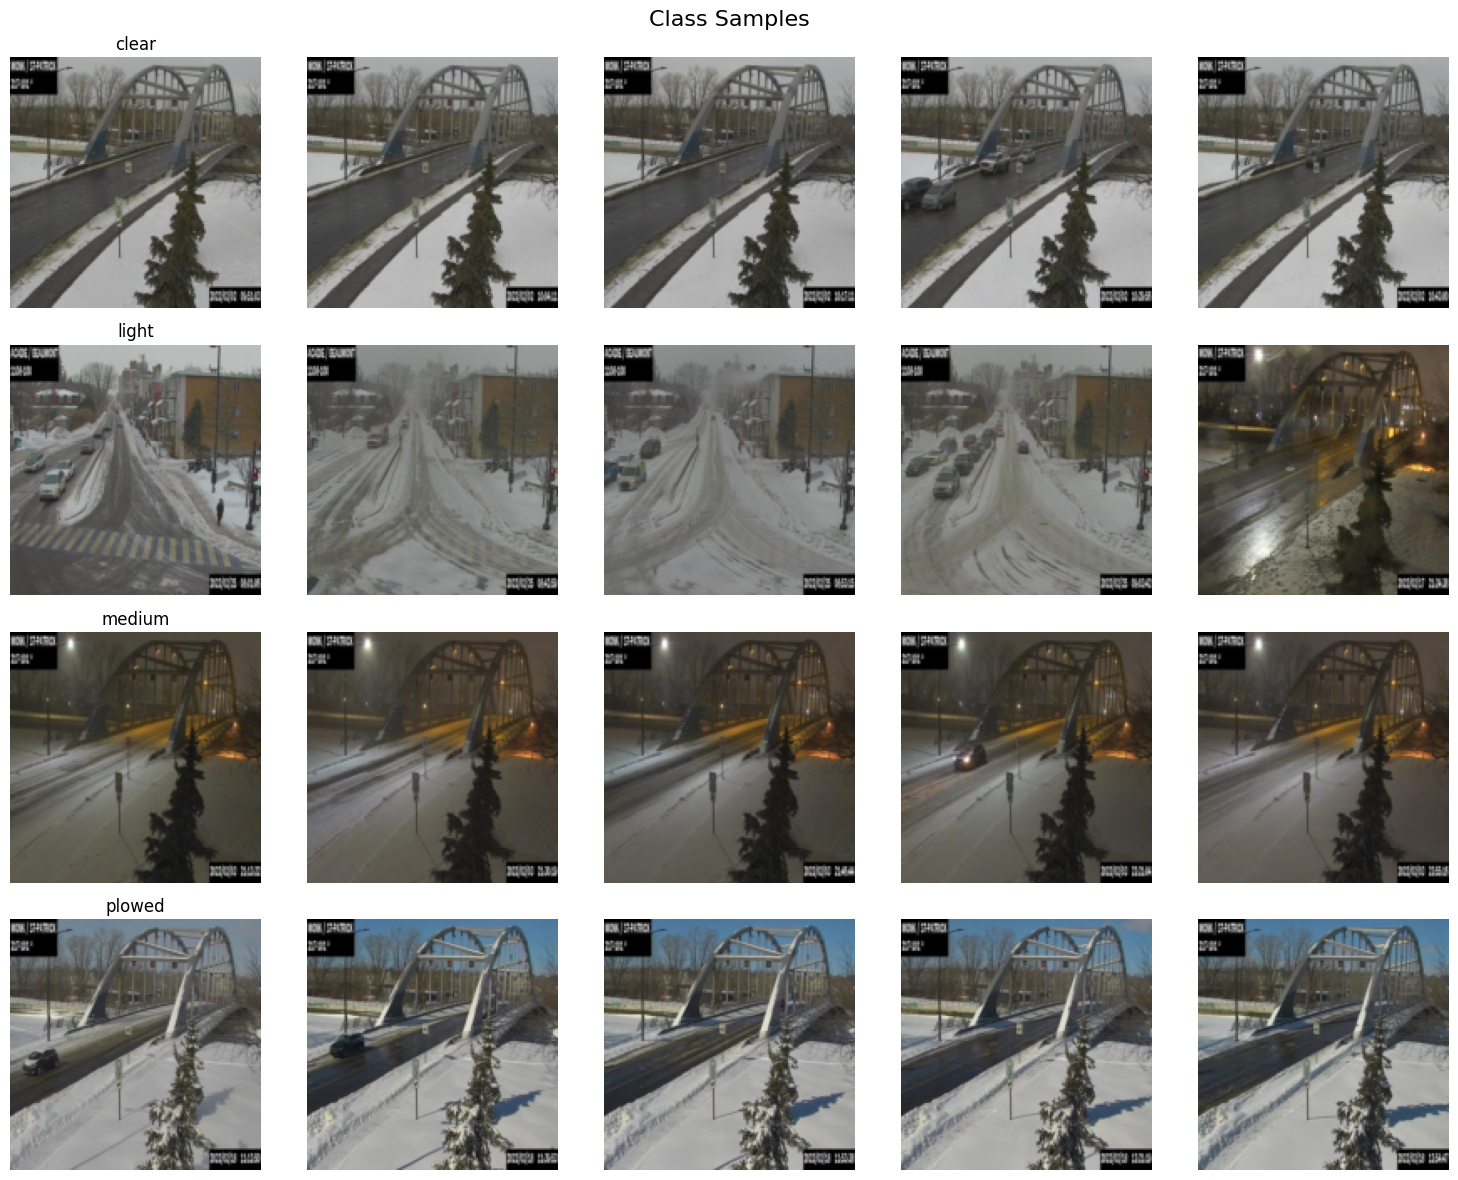

In [9]:
def plot_class_samples(dataset, num_samples=5):
    class_indices = {cls: [] for cls in dataset.classes}
    
    for idx, (_, label) in enumerate(dataset):
        class_name = dataset.classes[label]
        if len(class_indices[class_name]) < num_samples:
            class_indices[class_name].append(idx)
    
    fig, axes = plt.subplots(len(dataset.classes), num_samples, figsize=(num_samples * 3, len(dataset.classes) * 3))
    fig.suptitle("Class Samples", fontsize=16)
    
    for class_idx, (class_name, indices) in enumerate(class_indices.items()):
        for sample_idx, idx in enumerate(indices):
            img, _ = dataset[idx]
            img = img / 2 + 0.5  # unnormalize
            npimg = img.numpy()
            ax = axes[class_idx, sample_idx]
            ax.imshow(np.transpose(npimg, (1, 2, 0)))
            ax.axis('off')
            if sample_idx == 0:
                ax.set_title(class_name)
    
    plt.tight_layout()
    plt.show()

plot_class_samples(train_dataset)